# Visualizing what convnets learn

In [19]:
import numpy as np

from keras.models import load_model
from keras.preprocessing import image
from keras import models

import matplotlib.pyplot as plt

## Visualizing intermediate activations

In [2]:
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Get a test picture

In [7]:
img_path = 'cats_and_dogs/test/cats/cat.1700.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) # preprocess img into a 4D tensor
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


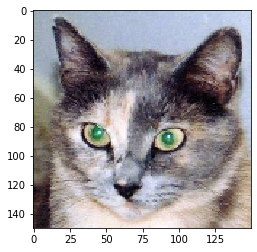

In [18]:
plt.imshow(img_tensor[0])
plt.show()

Create a Keras model that takes images as input, then output activations of all convolution & pooling layers

In [20]:
layer_outputs = [layer.output for layer in model.layers[:8]] # get output of top 8 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # return 8 outputs per image, which are the processed img after each layer
activations = activation_model.predict(img_tensor) # return a list of 8 numpy arrays: 1 array per layer activation

In [21]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


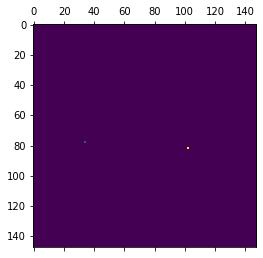

In [24]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')